In [3]:
%load_ext autoreload 
%autoreload 2
import json, os, cv2
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import glob
import h5py
from astropy.convolution import interpolate_replace_nans
import matplotlib.gridspec as gridspec


from utils.base_functions import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\042023\G8CKLT\oa\testG8CKLT_042023_oa.h5")

In [4]:
df['time'].mean()

KeyError: 'time'

In [86]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'lind' not in col]
for ind, row in df.iterrows(): 
    if row['odd'] == True:
        nose_list = row['nose_x_cm'] 
        odd_ind = np.argmax(nose_list>16)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][odd_ind:]
        #use odd_ind to index into obstacle 
        # iterate over columns list  
        #create gt_obstacle points
    else: 
        nose_list = row['nose_x_cm']
        even_ind = np.argmax(nose_list<50)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][even_ind:]

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3885457295.py:16: RuntimeWarning: invalid value encountered in less
  even_ind = np.argmax(nose_list<50)
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3885457295.py:16: RuntimeWarning: invalid value encountered in less
  even_ind = np.argmax(nose_list<50)
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3885457295.py:8: RuntimeWarning: invalid value encountered in greater
  odd_ind = np.argmax(nose_list>16)


In [74]:
for ind,row in df.iterrows():
    nose_points = row['nose_x_cm'].astype(float)
    nose_points = nose_points[~np.isnan(nose_points)]
    if np.nanmean(nose_points[:10])<= 20:
        df.at[ind,'odd'] = True
    elif np.nanmean(nose_points[:10]) >=20:
        df.at[ind,'odd'] = False

In [ ]:
for ind,row in df.iterrows():
    nose_points = row['nose_x_cm'].astype(float)
    nose_points = nose_points[~np.isnan(nose_points)]
    if np.nanmean(nose_points[:10])<= 20:
        df.at[ind,'odd'] = True
    elif np.nanmean(nose_points[:10]) >=20:
        df.at[ind,'odd'] = False

In [76]:
df[['odd','nose_x_cm']].head()

,odd,nose_x_cm
0,False,"[48.50038320197105, 48.37061871154708, 48.1506..."
1,False,"[53.89772174577708, 53.88973244186561, 53.8559..."
2,True,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,True,"[8.562066472482204, 8.526262801387126, nan, na..."


(10.0, 71.0)

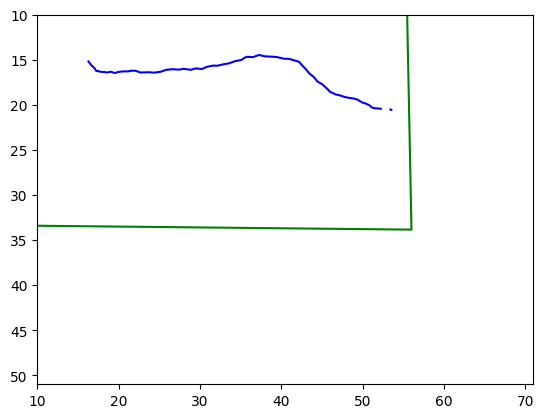

In [95]:
plt.plot(df.at[10,'ts_nose_x_cm'],df.at[10,'ts_nose_y_cm'],c ='b')
plt.plot([df.at[10,'mean_arenaTL_x_cm'], df.at[10,'mean_arenaTR_x_cm'], df.at[10,'mean_arenaBR_x_cm'], df.at[10,'mean_arenaBL_x_cm'],df.at[10,'mean_arenaTL_x_cm']],
            [df.at[10,'mean_arenaTL_y_cm'], df.at[10,'mean_arenaTR_y_cm'], df.at[10,'mean_arenaBR_y_cm'], df.at[10,'mean_arenaBL_y_cm'],df.at[10,'mean_arenaTL_y_cm']],color='green')



plt.ylim([51,10]); plt.xlim([10, 71])

In [66]:
nose_x = nose_x.astype(float)[~np.isnan(nose_x.astype(float))]
nose_y = nose_y.astype(float)[~np.isnan(nose_y.astype(float))]

In [117]:
enumerate(x_array)

In [124]:
df['time'] = df['len']/60

In [191]:
df['time'][df['time']< 10].index

Int64Index([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
            21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 41,
            43, 45, 46, 48, 51, 52, 53, 54, 55, 58, 60, 61, 62],
           dtype='int64')

In [173]:
x_array.shape

(74,)

In [175]:
ind

2

In [179]:
x_array.shape

(74,)

In [178]:
x_array[df['time'][df['time']< 10].index].shape

(62,)

In [211]:
frame['time'][frame['time']< 10].index

Int64Index([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 22, 24, 26, 28, 30, 32, 34, 36,
            38, 46, 48, 52, 54, 58, 60, 62],
           dtype='int64')

In [212]:
x_array_left[32]

IndexError: index 32 is out of bounds for axis 0 with size 31

In [206]:
x_array_left[frame['time'][frame['time']< 10].index]

IndexError: index 32 is out of bounds for axis 0 with size 31

In [205]:
frame['time'][[frame['time']< 10].index.items()]

AttributeError: 'builtin_function_or_method' object has no attribute 'items'

In [223]:
y_array_left = y_array_left[frame['time'][frame['time']< 10].index]

In [243]:
y_array_left.shape

(25,)

In [245]:
x_array_right.shape

(22,)

In [246]:
x_array_left[frame['time'][frame['time']< 10].index]

IndexError: index 25 is out of bounds for axis 0 with size 25

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\1969982022.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for direction,frame in directions:


KeyError: 'ts_nose_x_cm'

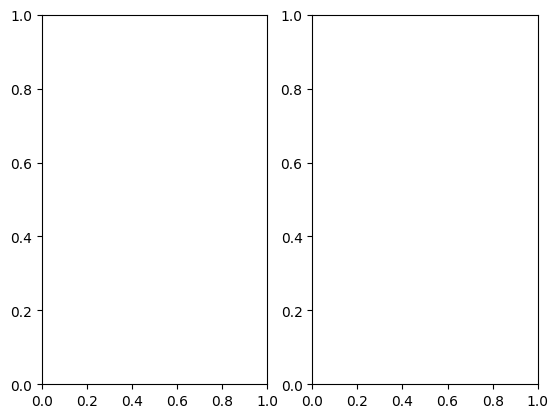

In [247]:
fig, ax = plt.subplots(1,2)
directions = df.groupby(['odd'])
for direction,frame in directions:
    if direction == 'left':
        frame = frame.reset_index()
        x_array_left,x_array_left = frame['ts_nose_x_cm'].to_numpy(), frame['ts_nose_y_cm'].to_numpy()
        x_array_left = x_array_left[frame['time'][frame['time']< 10].index]
        y_array_left = y_array_left[frame['time'][frame['time']< 10].index]
    else:
        frame = frame.reset_index()
        x_array_right,y_array_right = frame['ts_nose_x_cm'].to_numpy(), frame['ts_nose_y_cm'].to_numpy()
        x_array_right = x_array_right[frame['time'][frame['time']< 10].index]
        y_array_right = y_array_right[frame['time'][frame['time']< 10].index]
for ind in range(len(x_array_left)):
    ax[0].plot(x_array_left[ind],y_array_left[ind])


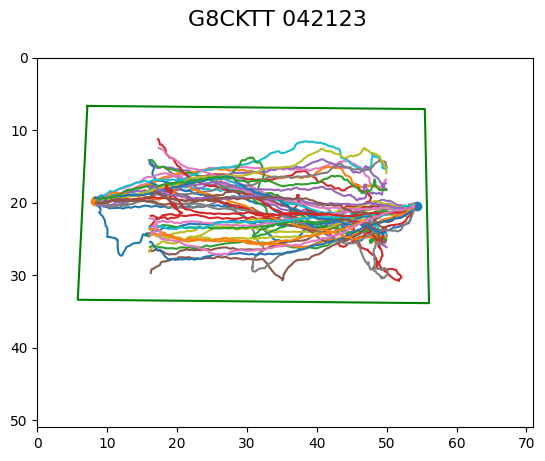

In [192]:
x_array, y_array =  df['ts_nose_x_cm'].to_numpy(), df['ts_nose_y_cm'].to_numpy()
x_array = x_array[df['time'][df['time']< 10].index]
y_array = y_array[df['time'][df['time']< 10].index]
fig, ax = plt.subplots()
fig.suptitle(str(df.at[0,'animal']) + " " +str(df.at[0,'date']) , fontsize=16)
plt.ylim([51,0]); plt.xlim([0, 71])
plt.plot([df.at[2,'mean_arenaTL_x_cm'], df.at[2,'mean_arenaTR_x_cm'], df.at[2,'mean_arenaBR_x_cm'], df.at[2,'mean_arenaBL_x_cm'],df.at[2,'mean_arenaTL_x_cm']],
            [df.at[2,'mean_arenaTL_y_cm'], df.at[2,'mean_arenaTR_y_cm'], df.at[2,'mean_arenaBR_y_cm'], df.at[2,'mean_arenaBL_y_cm'],df.at[2,'mean_arenaTL_y_cm']],color='green')
plt.scatter(df.at[2,'mean_rightportT_x_cm'],df.at[2,'mean_rightportT_y_cm'])

plt.scatter(df.at[2,'mean_leftportT_x_cm'],df.at[2,'mean_leftportT_y_cm'])
for ind in range(len(x_array)):
    ax.plot(x_array[ind],y_array[ind])

#fig.savefig(r'C:\Users\nlab\Documents\GitHub\obstacle_avoidance\no_obstacle/'+'fast_trials'+str(df.at[0,'animal']) + "_" +str(df.at[0,'date'])+'.png')

TypeError: unsupported operand type(s) for +: 'bool' and 'str'

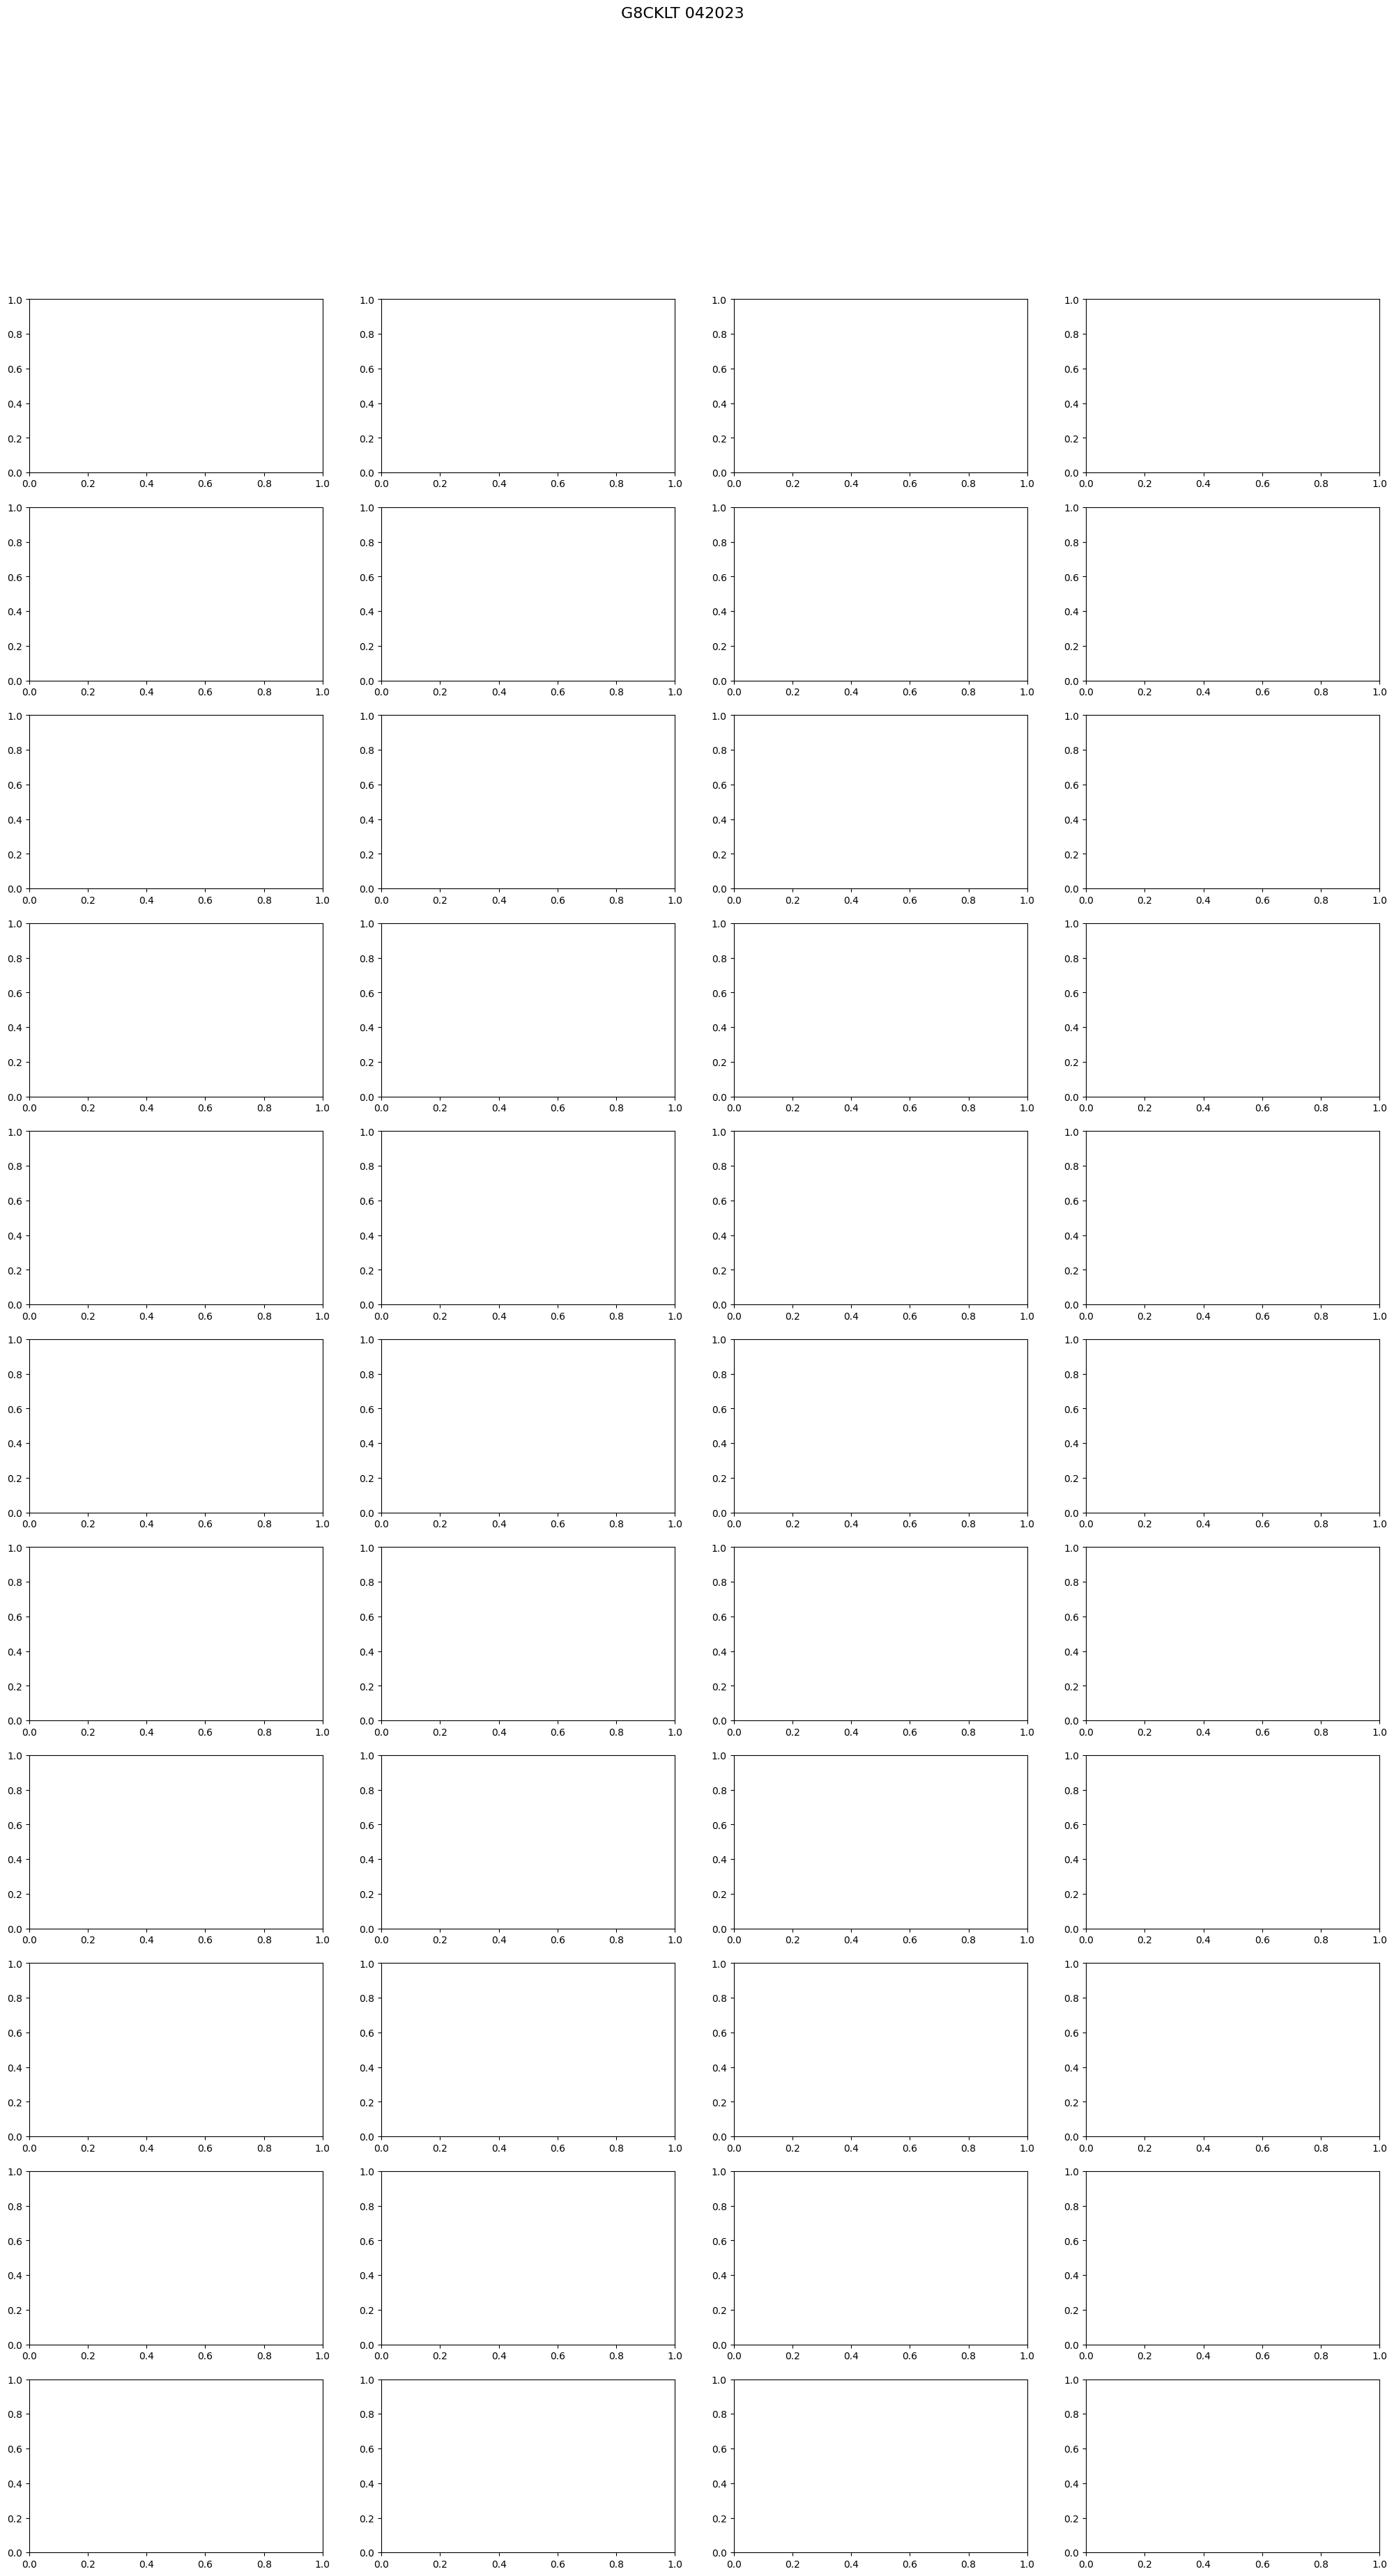

In [242]:
y = nearestX_roundup(len(df),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(df)),dpi = 100)
fig.suptitle(str(df.at[0,'animal']) + " " +str(df.at[0,'date']) , fontsize=16)
for ind,row in df.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.gca().set_title(str(row['odd'] + " " + str(np.round(row['time']))))
  
    plt.plot([row['mean_arenaTL_x_cm'], row['mean_arenaTR_x_cm'], row['mean_arenaBR_x_cm'], row['mean_arenaBL_x_cm'],row['mean_arenaTL_x_cm']],
                [row['mean_arenaTL_y_cm'], row['mean_arenaTR_y_cm'], row['mean_arenaBR_y_cm'], row['mean_arenaBL_y_cm'],row['mean_arenaTL_y_cm']],color='orange')
 
    plt.scatter(row['mean_leftportT_x_cm'],row['mean_leftportT_y_cm'],color='blue')
    plt.scatter(row['mean_rightportT_x_cm'],row['mean_rightportT_y_cm'],color='black')
    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'], color = 'c')
    plt.ylim([52,0]); plt.xlim([0, 72])

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3876392223.py:5: RuntimeWarning: invalid value encountered in greater
  plt.plot(nose_x[np.argwhere( (nose_x> 16 ) & (nose_x<50))],nose_y[np.argwhere( (nose_x> 16 ) & (nose_x<50))])
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3876392223.py:5: RuntimeWarning: invalid value encountered in less
  plt.plot(nose_x[np.argwhere( (nose_x> 16 ) & (nose_x<50))],nose_y[np.argwhere( (nose_x> 16 ) & (nose_x<50))])


(2.0, 72.0)

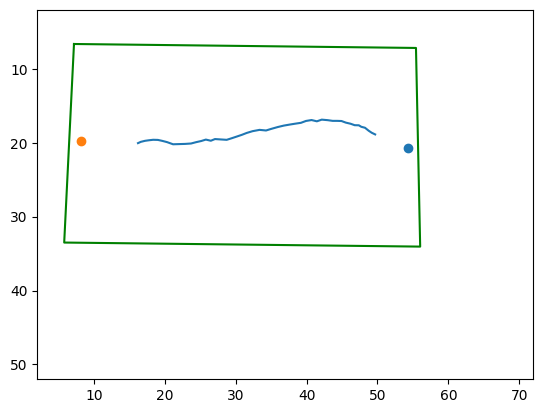

In [47]:

#plt.plot(df.at[2,'interp_x_cm'],df.at[2,'interp_y_cm'],c ='r')

#plt.plot(df.at[2,'ts_nose_x_cm'],df.at[2,'ts_nose_y_cm'],c ='b')

plt.plot(nose_x[np.argwhere( (nose_x> 16 ) & (nose_x<50))],nose_y[np.argwhere( (nose_x> 16 ) & (nose_x<50))])
plt.plot([df.at[2,'mean_arenaTL_x_cm'], df.at[2,'mean_arenaTR_x_cm'], df.at[2,'mean_arenaBR_x_cm'], df.at[2,'mean_arenaBL_x_cm'],df.at[2,'mean_arenaTL_x_cm']],
            [df.at[2,'mean_arenaTL_y_cm'], df.at[2,'mean_arenaTR_y_cm'], df.at[2,'mean_arenaBR_y_cm'], df.at[2,'mean_arenaBL_y_cm'],df.at[2,'mean_arenaTL_y_cm']],color='green')
plt.scatter(df.at[2,'mean_rightportT_x_cm'],df.at[2,'mean_rightportT_y_cm'])

plt.scatter(df.at[2,'mean_leftportT_x_cm'],df.at[2,'mean_leftportT_y_cm'])



plt.ylim([52,2]); plt.xlim([2, 72])

In [40]:
nose_x, nose_y = df.at[2,'nose_x_cm'], df.at[2,'nose_y_cm']

ts_nose_x =  np.argwhere( (nose_x> 13 ) & (nose_x<50))

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3246850069.py:3: RuntimeWarning: invalid value encountered in greater
  ts_nose_x =  np.argwhere( (nose_x> 13 ) & (nose_x<50))
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\3246850069.py:3: RuntimeWarning: invalid value encountered in less
  ts_nose_x =  np.argwhere( (nose_x> 13 ) & (nose_x<50))


In [43]:
nose_x

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [42]:
nose_x[np.argwhere( (nose_x> 13 ) & (nose_x<50))]

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\265380135.py:1: RuntimeWarning: invalid value encountered in greater
  nose_x[np.argwhere( (nose_x> 13 ) & (nose_x<50))]
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\265380135.py:1: RuntimeWarning: invalid value encountered in less
  nose_x[np.argwhere( (nose_x> 13 ) & (nose_x<50))]


array([[14.697787153934705],
       [14.76174876615507],
       [14.902932251070304],
       [14.99946685054329],
       [15.010640262252304],
       [14.967466083271002],
       [14.802868760090691],
       [14.82201695850237],
       [14.732783305290093],
       [14.642831050242046],
       [14.514789268596088],
       [14.442418563176355],
       [14.404428237505266],
       [14.366667767640232],
       [14.282996624934455],
       [14.189738075581435],
       [14.116751598554957],
       [14.056570509460476],
       [13.984706696581462],
       [13.922392787560282],
       [13.898382533966865],
       [13.857764593502361],
       [13.82707521409198],
       [13.572444581447803],
       [13.4762656535905],
       [13.475521646639326],
       [13.320967812416164],
       [13.308228961691183],
       [13.229602549044587],
       [13.184358458041402],
       [13.153571087471597],
       [13.167283800953806],
       [13.167525754433862],
       [13.129617692945994],
       [13.161371667

In [39]:
df.at[2,'mean_rightportT_x_cm']

54.30134126647273

In [10]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'lind' not in col]
# check if odd or even trial
#  get first index when nose crosses a distance thresh hold
#trail start = ts
##odd tiral at 16 cm even at 56 cm     
for ind, row in df.iterrows(): 
    if row['odd'] == True:
        nose_list = row['nose_x_cm'] 
        odd_ind = np.argmax(nose_list>16)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][odd_ind:]
        #use odd_ind to index into obstacle 
        # iterate over columns list  
        #create gt_obstacle points
    else: 
        nose_list = row['nose_x_cm']
        even_ind = np.argmax(nose_list<56)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][even_ind:]

C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\2868950691.py:20: RuntimeWarning: invalid value encountered in less
  even_ind = np.argmax(nose_list<56)
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\2868950691.py:20: RuntimeWarning: invalid value encountered in less
  even_ind = np.argmax(nose_list<56)
C:\Users\nlab\AppData\Local\Temp\ipykernel_14344\2868950691.py:12: RuntimeWarning: invalid value encountered in greater
  odd_ind = np.argmax(nose_list>16)


In [29]:
df.columns.to_numpy()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'leftportT_x', 'leftportT_y',
       'leftportT_likelihood', 'leftportB_x', 'leftportB_y',
       'leftportB_likelihood', 'rightportT_x', 'rightportT_y',
       'rightportT_likelihood', 'rightportB_x', 'rightportB_y',
       'rightportB_likelihood', 'len', 'animal', 'date', 'ta

In [32]:
df[['mean_rightportT_x_cm',  'mean_leftportT_x_cm']].head()

,mean_rightportT_x_cm,mean_leftportT_x_cm
0,54.301341,8.13063
1,54.301341,8.13063
2,54.301341,8.13063
3,54.301341,8.13063
4,54.301341,8.13063


In [33]:
df[['nose_x_cm',  'odd']].head()

,nose_x_cm,odd
0,"[48.50038320197105, 48.37061871154708, 48.1506...",False
1,"[53.89772174577708, 53.88973244186561, 53.8559...",False
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
3,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
4,"[8.562066472482204, 8.526262801387126, nan, na...",True


In [34]:
df.at[2,'nose_x_cm']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [47]:
def df_to_array(df):
    

SyntaxError: unexpected EOF while parsing (4105248151.py, line 1)

In [15]:
def get_median_trace(df):
        fake_time = np.linspace(0,1,100)
        all_nose_positions = np.zeros([len(df), 2, 100])
        count =  0
        for ind, row in df.iterrows():
            xT = np.linspace(0,1,len(row['nose_x_cm'])); yT = np.linspace(0,1,len(row['nose_y_cm']))
            all_nose_positions[count,0,:] = interp1d(xT, row['nose_x_cm'], bounds_error=False)(fake_time)
            all_nose_positions[count,1, :] = interp1d(yT, row['nose_y_cm'], bounds_error=False)(fake_time)
            count += 1
        median_trace = np.nanmean(all_nose_positions, axis=0)
        for ind, row in df.iterrows():
            df.at[ind,'median_x_cm'] = median_trace[0,:].astype(object); df.at[ind,'median_y_cm'] = median_trace[1,:].astype(object)
        return all_nose_positions
    

In [36]:
def get_interp_trace(df):
        fake_time = np.linspace(0,1,100)
        #all_nose_positions = np.zeros([len(df), 2, 100])
        #count =  0
        for ind, row in df.iterrows():
            xT = np.linspace(0,1,len(row['nose_x_cm'])); yT = np.linspace(0,1,len(row['nose_y_cm']))
            interp_x = interp1d(xT, row['nose_x_cm'], bounds_error=False)(fake_time)
            interp_y = interp1d(yT, row['nose_y_cm'], bounds_error=False)(fake_time)
            df.at[ind,'interp_x_cm'] = interp_x.astype(object) 
            df.at[ind,'interp_y_cm'] = interp_y.astype(object)

            #count += 1
        #median_trace = np.nanmean(all_nose_positions, axis=0)
        #for ind, row in df.iterrows():
            #df.at[ind,'median_x_cm'] = median_trace[0,:].astype(object); df.at[ind,'median_y_cm'] = median_trace[1,:].astype(object)
        #return all_nose_positions

In [16]:
x= get_median_trace(df)

In [37]:
get_interp_trace(df)

In [24]:
nose_x = x[:,0,:]

In [27]:
df['interp_x'],df['interp_y'] =x[:,0,:],x[:,1,:]

ValueError: Expected a 1D array, got an array with shape (123, 100)

In [ ]:
x,y = df['nose_x_cm'].to_numpy(),df['nose_y_cm'].to_numpy()

(3.0, 72.0)

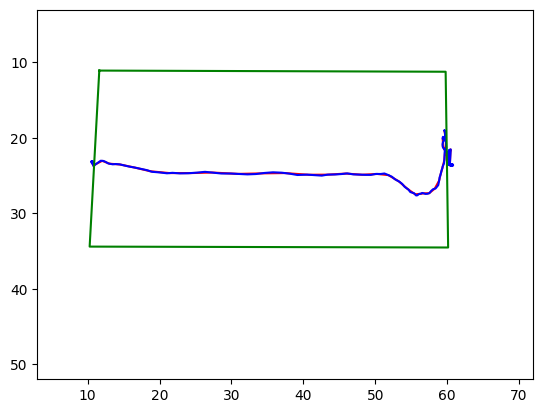

In [41]:

plt.plot(df.at[3,'interp_x_cm'],df.at[3,'interp_y_cm'],c ='r')

plt.plot(df.at[3,'nose_x_cm'],df.at[3,'nose_y_cm'],c ='b')
plt.plot([df.at[3,'mean_arenaTL_x_cm'], df.at[3,'mean_arenaTR_x_cm'], df.at[3,'mean_arenaBR_x_cm'], df.at[3,'mean_arenaBL_x_cm'],df.at[3,'mean_arenaTL_x_cm']],
            [df.at[3,'mean_arenaTL_y_cm'], df.at[3,'mean_arenaTR_y_cm'], df.at[3,'mean_arenaBR_y_cm'], df.at[3,'mean_arenaBL_y_cm'],df.at[3,'mean_arenaTL_y_cm']],color='green')



plt.ylim([52,3]); plt.xlim([3, 72])

(3.0, 72.0)

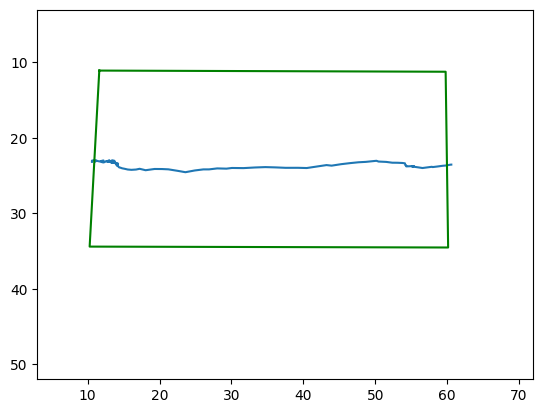

In [57]:
plt.plot(np.nanmean(np.stack(odd['interp_x_cm'].to_numpy()),axis=0),np.nanmean(np.stack(odd['interp_y_cm'].to_numpy()),axis=0))
plt.plot([df.at[3,'mean_arenaTL_x_cm'], df.at[3,'mean_arenaTR_x_cm'], df.at[3,'mean_arenaBR_x_cm'], df.at[3,'mean_arenaBL_x_cm'],df.at[3,'mean_arenaTL_x_cm']],
            [df.at[3,'mean_arenaTL_y_cm'], df.at[3,'mean_arenaTR_y_cm'], df.at[3,'mean_arenaBR_y_cm'], df.at[3,'mean_arenaBL_y_cm'],df.at[3,'mean_arenaTL_y_cm']],color='green')
plt.ylim([52,3]); plt.xlim([3, 72])

In [46]:
np.nanmean(odd['interp_x_cm'].astype('float').to_numpy())

ValueError: setting an array element with a sequence.